<a href="https://colab.research.google.com/github/didi-a-p/BootcampDataScienceAlura/blob/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/Desafios%20em%20notebooks%20separados/Desafios_Aula_5_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker

In [2]:
pd.options.display.float_format = "{:.2f}".format

In [3]:
url = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"

In [4]:
dados = pd.read_csv(url, sep=";", skiprows=3, skipfooter=12, encoding="ISO-8859-1",engine='python',thousands='.', decimal=',')

In [5]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")


In [6]:
usaveis = dados[colunas_usaveis]


In [7]:
usaveis = usaveis.set_index("Unidade da Federação")


In [8]:
ordenado_por_total = usaveis.sort_values("Total", ascending= False)

In [9]:
ordenado_col_interessadas = ordenado_por_total[ordenado_por_total.columns[6:-1]]


In [10]:
mes_mais_recente = ordenado_por_total.columns[-2]

In [11]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]

# Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.



In [12]:
mes_mais_recente

'2020/Jul'

In [13]:
gastos_do_mais_recente

Unidade da Federação
35 São Paulo             282709570.31
31 Minas Gerais          120467187.34
41 Paraná                 80320852.69
43 Rio Grande do Sul      78929703.81
33 Rio de Janeiro         71540227.33
29 Bahia                  58898100.40
26 Pernambuco             62325444.34
42 Santa Catarina         51764534.76
23 Ceará                  30809221.22
52 Goiás                  33499284.38
15 Pará                   27618727.51
21 Maranhão               24374205.15
32 Espírito Santo         27460475.47
24 Rio Grande do Norte    19593057.45
25 Paraíba                15491469.06
53 Distrito Federal       22233542.26
50 Mato Grosso do Sul     12508717.35
22 Piauí                  18019214.49
27 Alagoas                13087850.40
51 Mato Grosso            13083151.70
13 Amazonas               13358514.02
28 Sergipe                 3312766.32
17 Tocantins               4489665.87
11 Rondônia                7407388.24
12 Acre                    1163813.08
14 Roraima                 27

In [14]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente

Unidade da Federação
35 São Paulo             282709570.31
31 Minas Gerais          120467187.34
41 Paraná                 80320852.69
43 Rio Grande do Sul      78929703.81
33 Rio de Janeiro         71540227.33
26 Pernambuco             62325444.34
29 Bahia                  58898100.40
42 Santa Catarina         51764534.76
52 Goiás                  33499284.38
23 Ceará                  30809221.22
15 Pará                   27618727.51
32 Espírito Santo         27460475.47
21 Maranhão               24374205.15
53 Distrito Federal       22233542.26
24 Rio Grande do Norte    19593057.45
22 Piauí                  18019214.49
25 Paraíba                15491469.06
13 Amazonas               13358514.02
27 Alagoas                13087850.40
51 Mato Grosso            13083151.70
50 Mato Grosso do Sul     12508717.35
11 Rondônia                7407388.24
17 Tocantins               4489665.87
28 Sergipe                 3312766.32
14 Roraima                 2739498.41
16 Amapá                   21

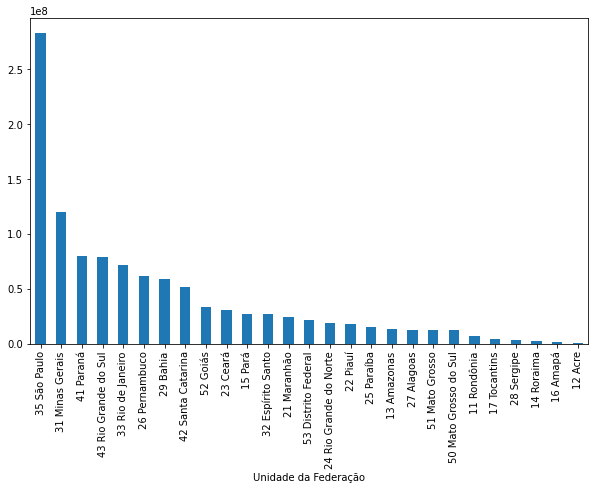

In [15]:
gastos_do_mais_recente.plot(kind='bar', figsize=(10,6))

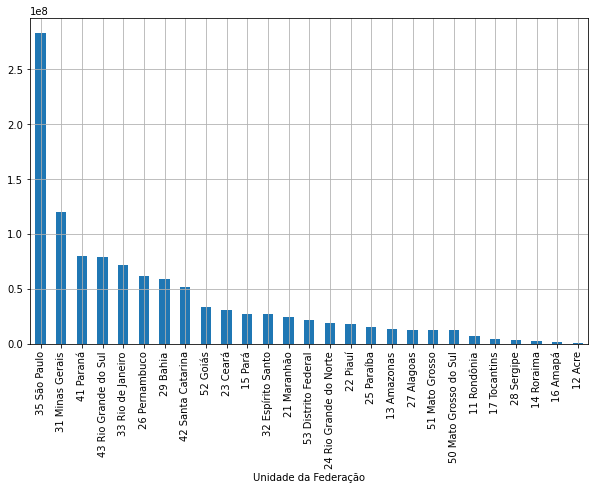

In [16]:
gastos_do_mais_recente.plot(grid=True, kind='bar', figsize=(10,6))

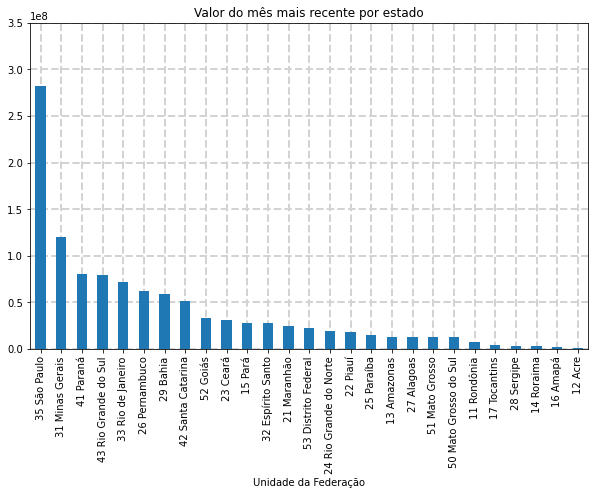

In [17]:
# passando a grade para trás das barras com zorder e mudando o tipo de linha com linestyle
ax = gastos_do_mais_recente.plot(kind='bar',zorder=2, figsize=(10,6))
plt.ylim(0,350000000)
plt.grid(b=True,
         which='major',
         axis='both',
         color='lightgrey',
        #  linestyle='-',
         linestyle='--',
        #  linestyle='-.',
        #  linestyle=':',
         linewidth=2,
         zorder=1)

plt.title('Valor do mês mais recente por estado')
plt.show()

# Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.



Estado: Pernambuco

In [18]:
gastos_do_mais_recente['26 Pernambuco']

62325444.34

In [19]:
gastos_do_mais_recente_PE = gastos_do_mais_recente / gastos_do_mais_recente['26 Pernambuco']
gastos_do_mais_recente_PE

Unidade da Federação
35 São Paulo             4.54
31 Minas Gerais          1.93
41 Paraná                1.29
43 Rio Grande do Sul     1.27
33 Rio de Janeiro        1.15
26 Pernambuco            1.00
29 Bahia                 0.95
42 Santa Catarina        0.83
52 Goiás                 0.54
23 Ceará                 0.49
15 Pará                  0.44
32 Espírito Santo        0.44
21 Maranhão              0.39
53 Distrito Federal      0.36
24 Rio Grande do Norte   0.31
22 Piauí                 0.29
25 Paraíba               0.25
13 Amazonas              0.21
27 Alagoas               0.21
51 Mato Grosso           0.21
50 Mato Grosso do Sul    0.20
11 Rondônia              0.12
17 Tocantins             0.07
28 Sergipe               0.05
14 Roraima               0.04
16 Amapá                 0.03
12 Acre                  0.02
Name: 2020/Jul, dtype: float64

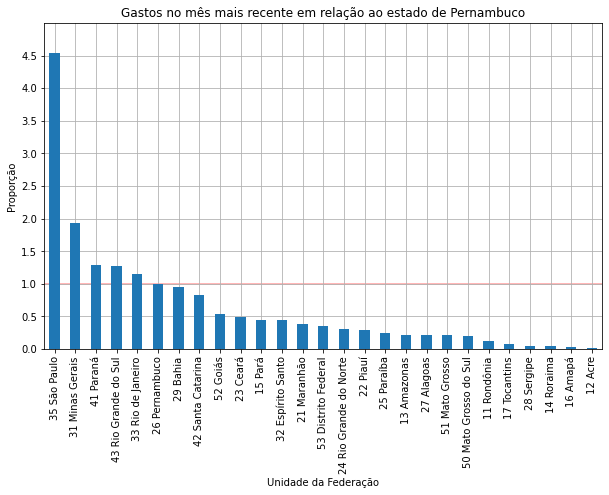

In [20]:
ax = gastos_do_mais_recente_PE.plot(kind='bar',zorder=2, figsize=(10,6))
plt.ylim(0,5)
plt.grid(b=True,
         which='major',
         axis='both',
         zorder=1)

plt.yticks(np.arange(0, 5, step=0.5))
plt.ylabel('Proporção')
plt.title('Gastos no mês mais recente em relação ao estado de Pernambuco')
plt.axhspan(0.99, 1.01, color='r', alpha=0.2)
plt.show()

Percebe-se que Minas Gerais possui quase o dobro, e Goiás e  Ceará possuem quase a metade do valor de Pernambuco.

# Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.



In [21]:
url_pop='https://raw.githubusercontent.com/didi-a-p/BootcampDataScienceAlura/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/dados/Pop%20-%20BRASIL_E_UFs.csv'

In [22]:
populacao = pd.read_csv(url_pop, usecols=[0,2])

In [23]:
# populacao.astype({'POPULAÇÃO ESTIMADA': 'int'})

In [24]:
populacao_regiao = populacao.loc[[0,8,18,23,27]]
populacao_regiao.reset_index(drop=True, inplace=True)
populacao_regiao

,Estado - Região,POPULAÇÃO ESTIMADA
0,Região Norte,18672591
1,Região Nordeste,57374243
2,Região Sudeste,89012240
3,Região Sul,30192315
4,Região Centro-Oeste,16504303


In [25]:
populacao_uf = populacao.loc[[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,19,20,21,22,24,25,26,28,29,30,31]]
populacao_uf.reset_index(drop=True, inplace=True)
populacao_uf.columns = ['Unidade da Federação', 'Populacao Estimada']
populacao_uf.head()

,Unidade da Federação,Populacao Estimada
0,Rondônia,1796460
1,Acre,894470
2,Amazonas,4207714
3,Roraima,631181
4,Pará,8690745


In [26]:
# cria um dicionário para substituir o nome das UFs e em seguida mesclar (merge) o DataFrame da população
# com o DataFrame dos gastos
nomes_uf = {}
for n in gastos_do_mais_recente.index:
  nomes_uf.update({' '.join(n.split()[1:]) : n})

In [27]:
populacao_uf['Unidade da Federação'].replace(nomes_uf, inplace=True)

In [28]:
populacao_uf.head()

,Unidade da Federação,Populacao Estimada
0,11 Rondônia,1796460
1,12 Acre,894470
2,13 Amazonas,4207714
3,14 Roraima,631181
4,15 Pará,8690745


In [29]:
gastos_pop = pd.merge(gastos_do_mais_recente, populacao_uf, on='Unidade da Federação')
gastos_pop.set_index('Unidade da Federação', inplace=True)

In [30]:
gastos_pop.head()

,2020/Jul,Populacao Estimada
Unidade da Federação,,
35 São Paulo,282709570.31,46289333
31 Minas Gerais,120467187.34,21292666
41 Paraná,80320852.69,11516840
43 Rio Grande do Sul,78929703.81,11422973
33 Rio de Janeiro,71540227.33,17366189


In [31]:
gastos_pop['Gasto/habitante'] = gastos_pop['2020/Jul']/gastos_pop['Populacao Estimada']
gastos_pop.head()

,2020/Jul,Populacao Estimada,Gasto/habitante
Unidade da Federação,,,
35 São Paulo,282709570.31,46289333,6.11
31 Minas Gerais,120467187.34,21292666,5.66
41 Paraná,80320852.69,11516840,6.97
43 Rio Grande do Sul,78929703.81,11422973,6.91
33 Rio de Janeiro,71540227.33,17366189,4.12


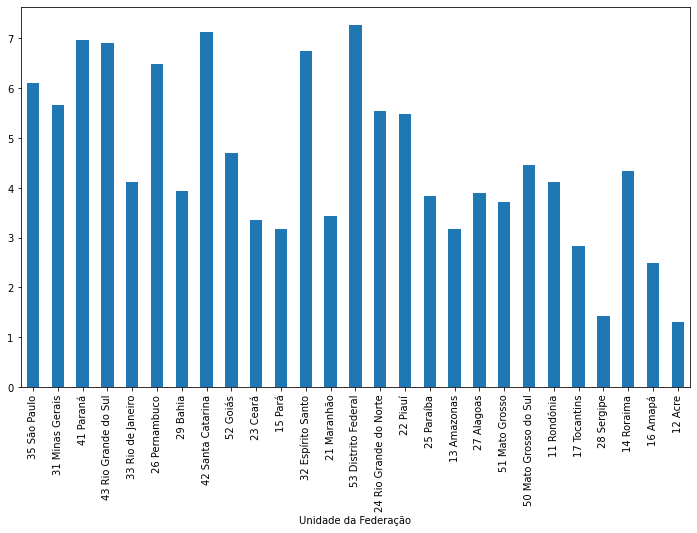

In [32]:
gastos_pop['Gasto/habitante'].plot(kind='bar', figsize=(12,7))

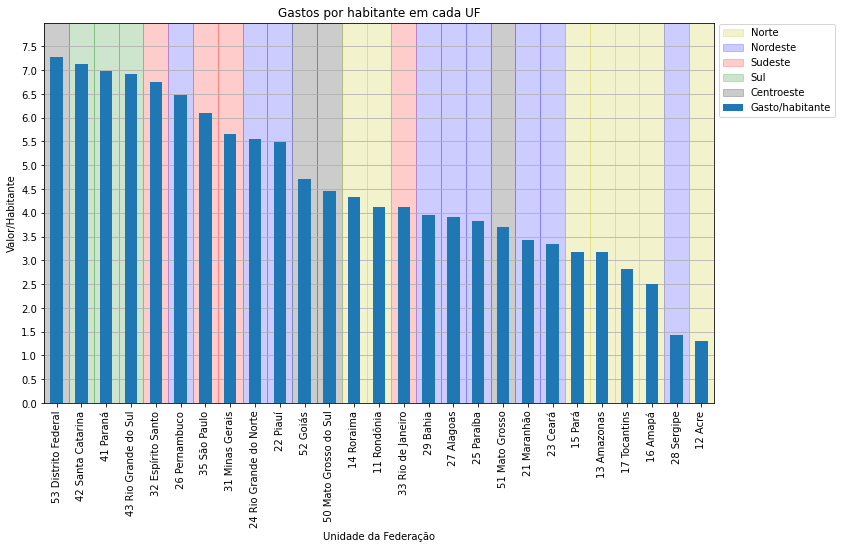

In [33]:
gastos_pop_ordenado = gastos_pop['Gasto/habitante'].sort_values(ascending=False)

ax = gastos_pop_ordenado.plot(kind='bar',zorder=2, figsize=(12,7))
plt.ylim(0,8)
plt.grid(b=True,
         which='major',
         axis='y',
         zorder=1)

for e in range(len(gastos_pop_ordenado.index)):
  if gastos_pop_ordenado.index[e][0] == '1':
    plt.axvspan(e-0.5, e+0.5, color='y', alpha=0.2,)
  elif gastos_pop_ordenado.index[e][0] == '2':
    plt.axvspan(e-0.5, e+0.5, color='b', alpha=0.2,)
  elif gastos_pop_ordenado.index[e][0] == '3':
    plt.axvspan(e-0.5, e+0.5, color='r', alpha=0.2,)
  elif gastos_pop_ordenado.index[e][0] == '4':
    plt.axvspan(e-0.5, e+0.5, color='g', alpha=0.2,)
  elif gastos_pop_ordenado.index[e][0] == '5':
    plt.axvspan(e-0.5, e+0.5, color='k', alpha=0.2,)

plt.axvspan(0,0,0,0, color='y', label='Norte', alpha=0.2,)
plt.axvspan(0,0,0,0, color='b', label='Nordeste', alpha=0.2,) 
plt.axvspan(0,0,0,0, color='r', label='Sudeste', alpha=0.2,)
plt.axvspan(0,0,0,0, color='g', label='Sul', alpha=0.2,) 
plt.axvspan(0,0,0,0, color='k', label='Centroeste', alpha=0.2,) 
plt.yticks(np.arange(0, 8, step=0.5))
plt.ylabel('Valor/Habitante')
plt.title('Gastos por habitante em cada UF')
plt.legend(bbox_to_anchor=(1, 1.01))
plt.show()

## Tentando plotar barras coloridas agrupadas

In [34]:
# usado = []
# cod_uf = ['1','2','3','4','5']
# for e in range(len(gastos_pop_ordenado.index)):
#   if e in usado:
#     pass
#   else:
#     for n in cod_uf:
#       try:
#         if gastos_pop_ordenado.index[e][0] == n:
#           grupo = []
#           while gastos_pop_ordenado.index[e][0] == n:
#             grupo.append(e)
#             usado.append(e)
#             e=e+1
#             print(e)
#           print(grupo)
#       except:
#         grupo = []
#         if gastos_pop_ordenado.index[26][0] == n:
#           grupo.append(26)
#           usado.append(26)
#           print(26)
#         print(grupo)
#         print('exept')
#       else:
#         # print('erro')
#         continue

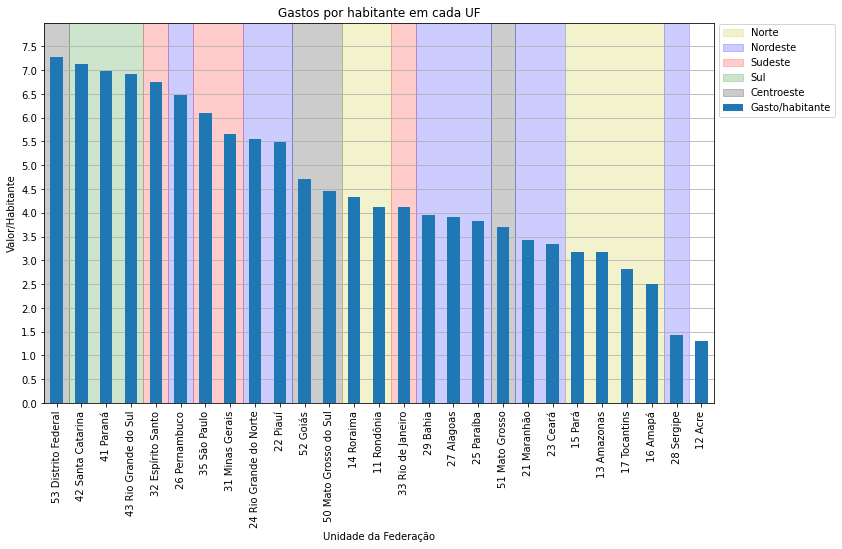

In [35]:
gastos_pop_ordenado = gastos_pop['Gasto/habitante'].sort_values(ascending=False)

ax = gastos_pop_ordenado.plot(kind='bar',zorder=2, figsize=(12,7))
plt.ylim(0,8)
plt.grid(b=True, which='major', axis='y', zorder=1)

usado = []
cod_uf = ['1','2','3','4','5']
color_uf = ['y','b','r','g','k']
for e in range(len(gastos_pop_ordenado.index)-1):
  if e in usado:
    pass
  else:
    for n in range(len(cod_uf)):
      if gastos_pop_ordenado.index[e][0] == cod_uf[n]:
          grupo = []
          while gastos_pop_ordenado.index[e][0] == cod_uf[n]:
            grupo.append(e)
            usado.append(e)
            e=e+1
          plt.axvspan(grupo[0]-0.5, grupo[-1]+0.5, color=color_uf[n], alpha=0.2,)

plt.axvspan(0,0,0,0, color='y', label='Norte', alpha=0.2,)
plt.axvspan(0,0,0,0, color='b', label='Nordeste', alpha=0.2,) 
plt.axvspan(0,0,0,0, color='r', label='Sudeste', alpha=0.2,)
plt.axvspan(0,0,0,0, color='g', label='Sul', alpha=0.2,) 
plt.axvspan(0,0,0,0, color='k', label='Centroeste', alpha=0.2,) 
plt.yticks(np.arange(0, 8, step=0.5))
plt.ylabel('Valor/Habitante')
plt.title('Gastos por habitante em cada UF')
plt.legend(bbox_to_anchor=(1, 1.01))
plt.show()

Apenas o acre não fica colorido.

### Colorir as barras ao invés do fundo

In [36]:
regioes = {'11 Rondônia' : 'Norte','12 Acre' : 'Norte','13 Amazonas' : 'Norte','14 Roraima' : 'Norte',
           '15 Pará' : 'Norte','16 Amapá' : 'Norte','17 Tocantins' : 'Norte',
           '21 Maranhão' : 'Nordeste','22 Piauí' : 'Nordeste','23 Ceará' : 'Nordeste',
           '24 Rio Grande do Norte' : 'Nordeste','25 Paraíba' : 'Nordeste','26 Pernambuco' : 'Nordeste',
           '27 Alagoas' : 'Nordeste','28 Sergipe' : 'Nordeste','29 Bahia' : 'Nordeste',
           '31 Minas Gerais' : 'Sudeste','32 Espírito Santo' : 'Sudeste','33 Rio de Janeiro' : 'Sudeste',
           '35 São Paulo' : 'Sudeste',
           '41 Paraná' : 'Sul','42 Santa Catarina' : 'Sul','43 Rio Grande do Sul' : 'Sul',
           '50 Mato Grosso do Sul' : 'Centroeste','51 Mato Grosso' : 'Centroeste','52 Goiás' : 'Centroeste',
           '53 Distrito Federal' : 'Centroeste',}

In [37]:
reg=[]
for i in gastos_pop_ordenado.index:
  reg.append(regioes[i])

reg

['Centroeste',
 'Sul',
 'Sul',
 'Sul',
 'Sudeste',
 'Nordeste',
 'Sudeste',
 'Sudeste',
 'Nordeste',
 'Nordeste',
 'Centroeste',
 'Centroeste',
 'Norte',
 'Norte',
 'Sudeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Centroeste',
 'Nordeste',
 'Nordeste',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Nordeste',
 'Norte']

In [38]:
gastos_pop_ordenado_regiao = pd.DataFrame(gastos_pop_ordenado)
gastos_pop_ordenado_regiao['Região'] = reg
gastos_pop_ordenado_regiao.head()

,Gasto/habitante,Região
Unidade da Federação,,
53 Distrito Federal,7.28,Centroeste
42 Santa Catarina,7.14,Sul
41 Paraná,6.97,Sul
43 Rio Grande do Sul,6.91,Sul
32 Espírito Santo,6.76,Sudeste


In [39]:
import matplotlib.patches as mpatches

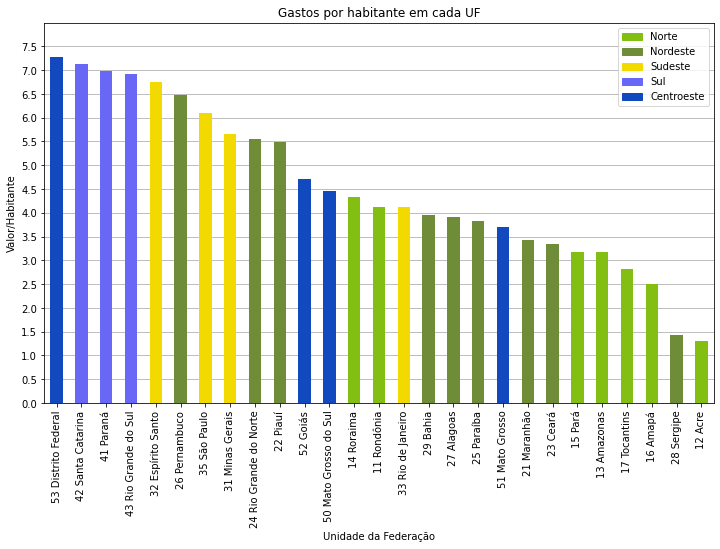

In [49]:
colors = {'Norte': '#83BF13', 'Nordeste': '#6F8C38', 'Sudeste': '#F2DA00', 'Sul':'#6967F5', 'Centroeste': '#1349BF'}

ax = gastos_pop_ordenado_regiao.plot(kind='bar',
                                     zorder=2,
                                     figsize=(12,7), 
                                     color=[[colors[i] for i in gastos_pop_ordenado_regiao['Região']]], 
                                     )

plt.ylim(0,8)
plt.grid(b=True, which='major', axis='y', zorder=1)

NT = mpatches.Patch(color='#83BF13', label='Norte')
ND = mpatches.Patch(color='#6F8C38', label='Nordeste')
SD = mpatches.Patch(color='#F2DA00', label='Sudeste')
SL = mpatches.Patch(color='#6967F5', label='Sul')
CO = mpatches.Patch(color='#1349BF', label='Centroeste')
plt.legend(handles=[NT,ND,SD,SL,CO], loc=1)

plt.yticks(np.arange(0, 8, step=0.5))
plt.ylabel('Valor/Habitante')
plt.title('Gastos por habitante em cada UF')
plt.show()

# Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.



In [41]:
ordenado_col_interessadas

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,5

In [42]:
ordenado_col_interessadas.loc[ordenado_col_interessadas.index[0]].mean()

250820809.21426672

In [43]:
media = []
for e in ordenado_col_interessadas.index:
  media.append(ordenado_col_interessadas.loc[e].mean())
media

[250820809.21426672,
 125447846.67933337,
 90937599.9121333,
 78797242.1191333,
 62560730.76866666,
 60514227.30486672,
 52892230.64806666,
 48174900.3158,
 40877445.93139997,
 30327820.10273335,
 29219995.8334,
 23889900.808666658,
 20684178.395666663,
 16333025.725666672,
 16241846.874533338,
 15954336.637266671,
 14344474.035266673,
 14015416.9338,
 13845568.461666666,
 13427789.971733341,
 11646928.117133334,
 7462501.094599999,
 6585702.869999997,
 6150201.275800001,
 2785022.683466667,
 2011846.9394000003,
 1920828.4535333335]

In [44]:
ordenado_col_interessadas['Media'] = media

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
ordenado_col_interessadas

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Media
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,250820809.21
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,125447846.68
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,90937599.91
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759